In [1]:
# import usual things
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
# import widget
import ipywidgets

# Review from last week

In [3]:
michigan_file = '/Users/jennifer/Desktop/IS 445 Data Visualization/week 4 - michigan_lld.flt' 
# Use tab to find

In [79]:
np.fromfile?

In [77]:
michigan = np.fromfile(michigan_file,dtype='f4').reshape((5365,4201)) # 2括号

In [80]:
np.fromfile(michigan_file,dtype='f4')

array([-9999.     , -9999.     , -9999.     , ...,    87.95175,
          85.95175,    83.95178], dtype=float32)

In [78]:
michigan

array([[-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       ...,
       [   58.87491 ,    59.874924,    58.874954, ...,    85.95175 ,
           89.95175 ,    89.95178 ],
       [   58.87491 ,    60.874924,    57.87494 , ...,    92.95175 ,
           89.95175 ,    84.95178 ],
       [   55.87491 ,    57.874924,    58.87494 , ...,    87.95175 ,
           85.95175 ,    83.95178 ]], dtype=float32)

In [5]:
# take out -9999 tags for missing data
michigan[michigan==-9999] = np.nan

/Users/jennifer/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


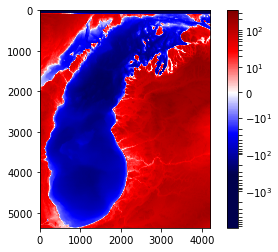

In [8]:
# step 0: even less fancy hardcoding
plt.imshow(michigan, cmap='seismic', norm=matplotlib.colors.SymLogNorm(10))
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

/Users/jennifer/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


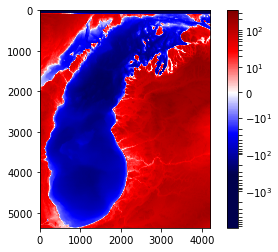

In [9]:
# step 1: hard code any parameters we may want to widgetize(?)
colormap_name = 'seismic'
take_log = True

if take_log:
    norm = matplotlib.colors.SymLogNorm(10) # symmetric log, base 10
else:
    norm = matplotlib.colors.Normalize() # "the usual" linear map
    
plt.imshow(michigan, cmap=colormap_name, norm=norm)
plt.colorbar() # put in a colorbar
plt.clim(-352, 352) # just to make the colormap centered around 0 (for divergent colormaps)
plt.show()

In [10]:
# step 2: turn this into a function with "hard coded" values as inputs
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

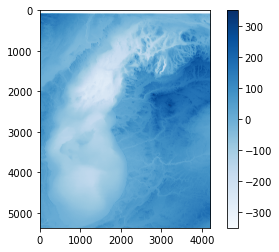

In [11]:
# step 2.5 -- try out your function!
michigan_plot('Blues',take_log=False)

In [75]:
# Step 3: use .interact to widgetize it!
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)

def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [16]:
buildings = pd.read_csv('https://uiuc-ischool-dataviz.github.io/is445_spring2022/week03/data/building_inventory.csv',
                       na_values={'Square Footage':0,
                                 'Year Acquired':0, 
                                 'Year Constructed':0,
                                 'Floors':0})    
# set na values

In [17]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [18]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [19]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

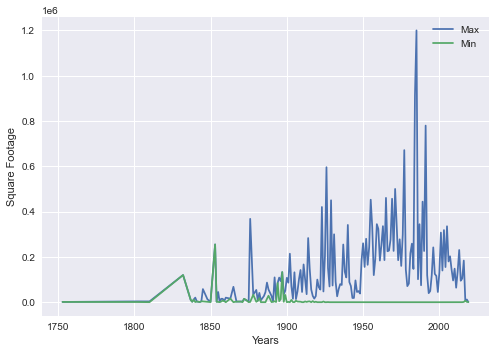

In [20]:
# step 1: hard-code something
style = 'seaborn'

with plt.style.context(style):
    plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
    plt.plot(stats['min'], label='Min')
    plt.xlabel('Years')
    plt.ylabel('Square Footage')
    plt.legend()
    plt.show()

In [17]:
stats['max']

Year Acquired
1753.0      1200.0
1802.0      3594.0
1810.0      3432.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    105000.0
2016.0    184000.0
2017.0      6720.0
2018.0     12000.0
2019.0       760.0
Name: max, Length: 171, dtype: float64

In [21]:
# step 2 -- make into a function
#style = 'seaborn'

def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
        plt.legend()
        plt.show()
        # 全选若干行tab可以同时indent

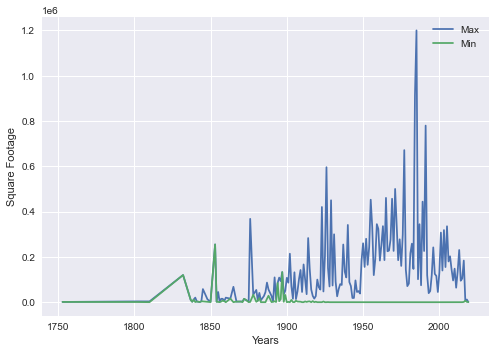

In [20]:
# 2.5 test the function
make_buildings_plot('seaborn')

In [26]:
# step 3: widgetize it!   
# do step 1-3 for each time想建widget

@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        plt.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        plt.plot(stats['min'], label='Min')
        #plt.plot(stats['max']*2)
        plt.xlabel('Years')
        plt.ylabel('Square Footage')
       # plt.yscale('log')   # 使1750-1800之间变化更明显
        plt.legend()
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

In [24]:
@ipywidgets.interact(style=plt.style.available)
def make_buildings_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(stats['max'], label='Max') # note "years" gets passed by default in the index
        ax.plot(stats['min'], label='Min')
        ax.set_xlabel('Years')
        ax.set_ylabel('Square Footage')
        #plt.yscale('log')
        ax.legend()
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

# Widgets on their own

In [27]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

In [28]:
itext.value = 10  # set a value "by hand"

In [30]:
ip = ipywidgets.IntProgress(value=70)   # value= ? 的数值可以自行设置
ip

IntProgress(value=70)

In [31]:
irange = ipywidgets.IntSlider(min=0, max=100, step=1)

In [32]:
irange

IntSlider(value=0)

In [33]:
irange # 和上面的irange同时改变

IntSlider(value=54)

### We want to figure out a way to  link the progress bar's value to the changes we make on the irange slider.

In [34]:
ip.keys # keys of our progress bar widget
# 带_的是不能改的

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [35]:
irange.keys # keys for the integer range slider

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [36]:
ip

IntProgress(value=70)

In [37]:
ip.value = 10

In [38]:
irange

IntSlider(value=61)

In [39]:
irange.value = 50

In [40]:
ipywidgets.jslink?

In [43]:
# create a link on the "frontend" (whatever that means right now)
ipywidgets.jslink((ip,'value'),(irange,'value'))
# link括号内的两个。做完这步之后ip和irange就变成动一个，另一个也在动

Link(source=(IntProgress(value=10), 'value'), target=(IntSlider(value=59), 'value'))

In [41]:
ip

IntProgress(value=10)

In [42]:
irange

IntSlider(value=50)

In [44]:
# use the layout widget "VBox" to put them in a a vertical stack放到一起显示
ipywidgets.VBox([ip,irange])

In [45]:
# linking on the backend with Python
ip2 = ipywidgets.IntProgress(value=90, max=200)
irange2 = ipywidgets.IntSlider(min=0,max=200,step=1)
ipywidgets.link((ip2,'value'),(irange2,'value'))  ## use "ipywidgets.link" function和上面一样的结果
ipywidgets.VBox([ip2,irange2])

In [ ]:
ipywidgets.IntProgress?

In [46]:
button = ipywidgets.Button(description="I am a button.")  ## set a button, but nothing do with the button for now
button

Button(description='I am a button.', style=ButtonStyle())

I have been clicked! Woo.


In [47]:
# let's define a function I want to run everytime I click this button. 但目前还没有变化
def say_click(event):
    print("I have been clicked! Woo.")

In [ ]:
#button.keys function doesn't show up!

In [48]:
button.on_click(say_click) ## 运营这步之后，就可以再点button显示“I have been clicked! Woo.”了

In [49]:
# let's connect multiple widgets with functions
ip = ipywidgets.IntProgress()  ## 建widget
ip

IntProgress(value=0)

In [50]:
button_plus = ipywidgets.Button(description="+10")  ## 使得一个widget +10
button_plus

Button(description='+10', style=ButtonStyle())

In [51]:
button_minus = ipywidgets.Button(description='-10')  ## 使得一个widget +-0
button_minus

Button(description='-10', style=ButtonStyle())

In [52]:
# before linking anything, let's lay them out in a nice way
ipywidgets.HBox([button_minus, ip, button_plus])
## 建好之后看到的样子

In [53]:
ip.value

0

In [54]:
ip.value=50  ## 设定目前value为50

In [55]:
# a function that will decrease by 10 the progress bar when I click on the "button_minus"
# widget
def click_down(event):
    ip.value -= 10

In [56]:
# attach this function to my button minus widget
button_minus.on_click(click_down)
## 运营完这步后可以-10，但还不能+10

In [57]:
# on clicking the button_plus
def click_up(event):
    ip.value += 10
button_plus.on_click(click_up)
## 运营完这步后可以+10了

In [58]:
# tie a colorpicker and a slider
islider = ipywidgets.IntSlider(min=0,max=10,step=1, orientation='vertical') # 把widget变成竖的

In [60]:
islider

IntSlider(value=4, max=10, orientation='vertical')

In [61]:
islider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [62]:
islider.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

In [63]:
islider.style.handle_color='#750075' # HTML style HEX code for a color (16 mill)，此时就变色咯

In [64]:
islider

IntSlider(value=8, max=10, orientation='vertical', style=SliderStyle(handle_color='#750075'))

In [65]:
cp = ipywidgets.ColorPicker()  ## 可以选择颜色
cp

ColorPicker(value='black')

In [66]:
ipywidgets.jslink((cp,'value'),(islider.style,'handle_color')) ## link

Link(source=(ColorPicker(value='#ce3b3b'), 'value'), target=(SliderStyle(handle_color='#750075'), 'handle_colo…

In [67]:
ipywidgets.VBox([cp,islider]) ## 此刻选了什么色，会立即显示在坐标上

In [68]:
class MyObject():
    name = 'unnamed'
    age = 0

In [69]:
# new variable of this type of class
my_obj = MyObject()

In [70]:
my_obj.name

'unnamed'

In [71]:
my_obj.age

0

In [72]:
my_obj.name = 'Bob'; my_obj.age = 47

In [73]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


In [66]:
my_obj.name = 'Linda'; my_obj.age = 45

In [67]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Linda and I am 45 years old


In [68]:
import traitlets

In [69]:
class MyTraitletObject(traitlets.HasTraits):
    name = traitlets.Unicode("unnamed")
    age = traitlets.Int(0)

In [70]:
my_tobj = MyTraitletObject()

In [71]:
my_tobj.name

'unnamed'

In [72]:
my_tobj.age

0

In [73]:
my_tobj.name = 'Bob'
my_tobj.age = 47

In [74]:
print('Hello my name is:', my_tobj.name, 'and I am', my_tobj.age, 'years old')

Hello my name is: Bob and I am 47 years old


In [75]:
def name_change(change):
    print(change)
    
my_tobj.observe(name_change, ['name'])
# .observe is going to "watch" for changes in the traits of my_tobj
# name_change is the name of the function with the action we want
# ['name'] is the (potentially list) of traits we want observed

In [76]:
my_tobj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7facbad17990>, 'type': 'change'}


In [77]:
def name_change2(change):
    #print('Hello my name is:', my_tobj.name, 'and I am', my_tobj.age, 'years old')
    print('Hello my name is:', change['new'], 'and I am', change['owner'].age, 'years old')
    
my_tobj.observe(name_change2, ['name'])

In [78]:
my_tobj.name = 'Bob'

{'name': 'name', 'old': 'Linda', 'new': 'Bob', 'owner': <__main__.MyTraitletObject object at 0x7facbad17990>, 'type': 'change'}
Hello my name is: Bob and I am 47 years old


In [79]:
# could re-define my_tobj or we can "unobserve" a function
my_tobj.unobserve(name_change,['name'])

In [80]:
my_tobj.name = 'Linda'

Hello my name is: Linda and I am 47 years old


In [81]:
my_tobj.age = 45

In [82]:
def age_change(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')
my_tobj.observe(age_change, ['age'])

In [83]:
my_tobj.name, my_tobj.age = 'Louise', 8

Hello my name is: Louise and I am 45 years old
Hello, my name is Louise and I am 8 years old


In [84]:
def print_age_change(change):
    print(change)
my_tobj.observe(print_age_change,['age'])

In [85]:
my_tobj.age = 13

Hello, my name is Louise and I am 13 years old
{'name': 'age', 'old': 8, 'new': 13, 'owner': <__main__.MyTraitletObject object at 0x7facbad17990>, 'type': 'change'}


In [86]:
my_tobj.unobserve(print_age_change, ['age'])

In [87]:
my_tobj.age = 8

Hello, my name is Louise and I am 8 years old


# Some widget customization
(Possible extension to the HW, but not required!)

In [89]:
# Step 3: use .interact to widgetize it!
@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [ ]:
ipywidgets.Dropdown?

In [90]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps())
cmap_widget

Dropdown(options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_…

In [91]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(), value='terrain')
cmap_widget

Dropdown(index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'Bu…

In [92]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [93]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(),
                                 value='terrain',
                                 description='Select a colormap:')
cmap_widget

Dropdown(description='Select a colormap:', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG…

In [94]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [95]:
cmap_widget.layout.width='800px' #changes the size of the drop down, not quite what we want

In [96]:
cmap_widget.layout.width = '300px'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [97]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [98]:
cmap_widget.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width']

In [99]:
cmap_widget.style.description_width = '300px'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [100]:
cmap_widget.style.description_width = 'initial'
cmap_widget

Dropdown(description='Select a colormap:', index=154, layout=Layout(width='300px'), options=('Accent', 'Accent…

In [101]:
ipywidgets.Checkbox?

In [102]:
log_check = ipywidgets.Checkbox(value=True, description='Take log of colormap?')
log_check

Checkbox(value=True, description='Take log of colormap?')

In [ ]:
#@ipywidgets.interact(colormap_name=plt.colormaps(), take_log=True)
@ipywidgets.interact(colormap_name=cmap_widget, take_log=log_check)
def michigan_plot(colormap_name, take_log=True):
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10)
    else:
        norm = matplotlib.colors.Normalize()
    plt.imshow(michigan,cmap=colormap_name,norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

#  Some notes about the homework (and the dataset)

In [105]:
ufos = pd.read_csv('/Users/jennifer/Desktop/IS 445 Data Visualization/Week 5 - ufo-scrubbed-geocoded-time-standardized-00.csv', 
                  names=["date", "city", "state", "country", 
                        "shape", "duration_seconds", "duration", 
                        "comment", "report_date", "latitude", "longitude"], 
                  parse_dates = ["date", "report_date"]) # tell pandas that these columns are dates

In [106]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [107]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [108]:
# downsample our data by pulling random indicies and only using rows that 
# correspond to those indicies
nsamples = 1000
downSampleMask = np.random.choice(range(len(ufos)-1),nsamples,replace=False)
# pull from 0-80331 a total of 1000 numbers, don't replace (don't double count)

In [109]:
downSampleMask

array([65721, 15630, 79240, 58533, 67358, 55301, 12255, 27136, 25635,
       50002, 77646, 26575, 42366, 59885, 58493, 11459, 32731, 40301,
       28089,  6880, 40924, 77652, 15305, 57173, 31461, 20451,  4427,
       11027, 58519, 45009, 37281, 72025, 40566, 77265, 25068, 34464,
       34644,   373, 25284, 63913, 26358, 76230, 24177, 61798, 54698,
       31748, 24362, 32896, 10329, 15212, 55503, 51453, 37756, 56160,
        7710, 51771, 10319, 67089, 51817, 32214, 73844, 68481, 65113,
       54652, 60680, 38089, 43731, 68034, 12333, 20435, 29269,   114,
       30007, 57475, 28735, 58227, 60981, 46818, 38383, 14530, 27776,
       62147, 21610, 38828, 13322,  3546, 69054, 35584, 53501, 68901,
       76787, 46565, 73717, 62689, 55111, 26349, 25232, 67144, 41816,
       44123, 80267, 56409, 60707, 60731, 36437,  5995,  5122,  6742,
       14760, 42339, 45902, 19276,  2383, 18478,  8480,  4190, 18413,
       61762, 36347, 45749, 46072, 58457, 61063, 56425, 38694, 34161,
       79688, 24337,

In [110]:
ufosDS = ufos.loc[downSampleMask]

In [111]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
65721,2007-08-13 01:00:00,brighton (uk/england),NaN,gb,triangle,7200.0,2 hours plus,Orbs &amp; 3 Triangles observed 13 minutes fi...,2007-10-08,50.833333,-0.150000
15630,2004-11-07 07:30:00,new york city (manhattan),ny,us,disk,300.0,3-5 minutes,4 metallic silver&#44 disc-shaped objects glid...,2004-12-03,40.714167,-74.006389
79240,2012-09-04 20:30:00,alpine (near),ut,us,flash,5.0,5 seconds,Disc flares and disappears over Mt. Timpanogos...,2012-09-24,40.453333,-111.777222
58533,2001-07-21 20:15:00,phoenix,az,us,fireball,3.0,3 seconds,Green fireball in northern Arizona sky.,2001-08-05,33.448333,-112.073333
67358,1974-08-18 23:50:00,colwyn bay (town) (uk/wales),NaN,gb,circle,10.0,00:10,object seen over wales england&#44in the 1970`s,2004-03-09,53.300000,-3.750000
...,...,...,...,...,...,...,...,...,...,...,...
23584,2008-12-08 05:00:00,virginia beach,va,us,fireball,1200.0,20min,Craft that was bright and looked like it was o...,2009-01-10,36.852778,-75.978333
50445,2007-06-20 21:56:00,albia,ia,us,light,8.0,8 seconds,2 points of lights resembling planets disappea...,2007-08-07,41.026667,-92.805556
195,2008-10-10 20:00:00,moon township,pa,NaN,unknown,120.0,2 minutes,unknown rectangular shaped aircraft with brigh...,2008-10-31,40.516977,-80.221348
34210,2008-03-30 20:48:00,uk/england,NaN,NaN,light,600.0,10 minutes,2 bright lights moving in perfect sync&#44 one...,2008-03-31,52.355518,-1.174320


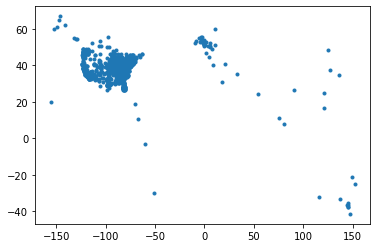

In [113]:
plt.plot(ufosDS['longitude'], ufosDS['latitude'], '.')
plt.show()

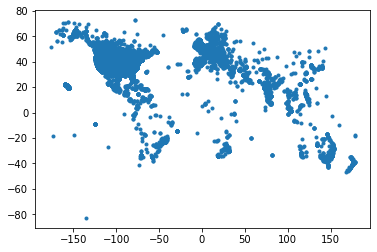

In [114]:
plt.plot(ufos['longitude'], ufos['latitude'], '.')
plt.show()

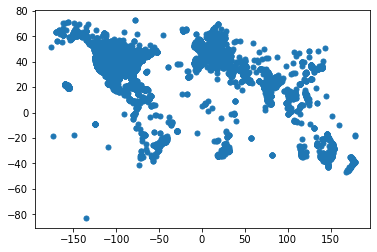

In [115]:
#plt.plot(ufos['longitude'], ufos['latitude'], '.', ms=20)
plt.plot(ufos['longitude'], ufos['latitude'], '.', markersize=10)

plt.show()

In [ ]:
plt.scatter?

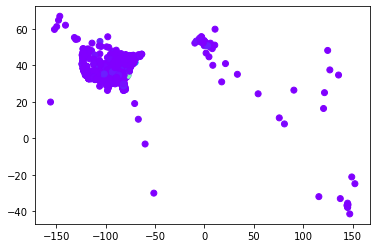

In [116]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=ufosDS['duration_seconds'], cmap='rainbow') # we know there are problems with rainbow!
plt.show()

In [117]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(0.5, 172800.0)

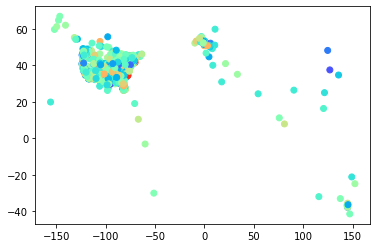

In [118]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=np.log10(ufosDS['duration_seconds']), cmap='rainbow') # we know there are problems with rainbow!
plt.show()

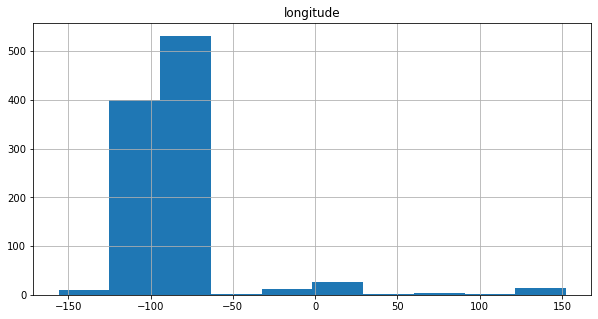

In [119]:
# quick hint
fig, ax = plt.subplots(figsize=(10,5))
ufosDS.hist(column='longitude', ax=ax)
plt.show()

In [ ]:
ufosDS.hist?

In [ ]:
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
           c=np.log10(ufosDS['duration_seconds']), 
            cmap='rainbow', s=200) # we know there are problems with rainbow!
plt.show()

In [ ]:
plt.scatter?